#### 等差数列

AP sequence
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Sum of AP sequence =  5050.0


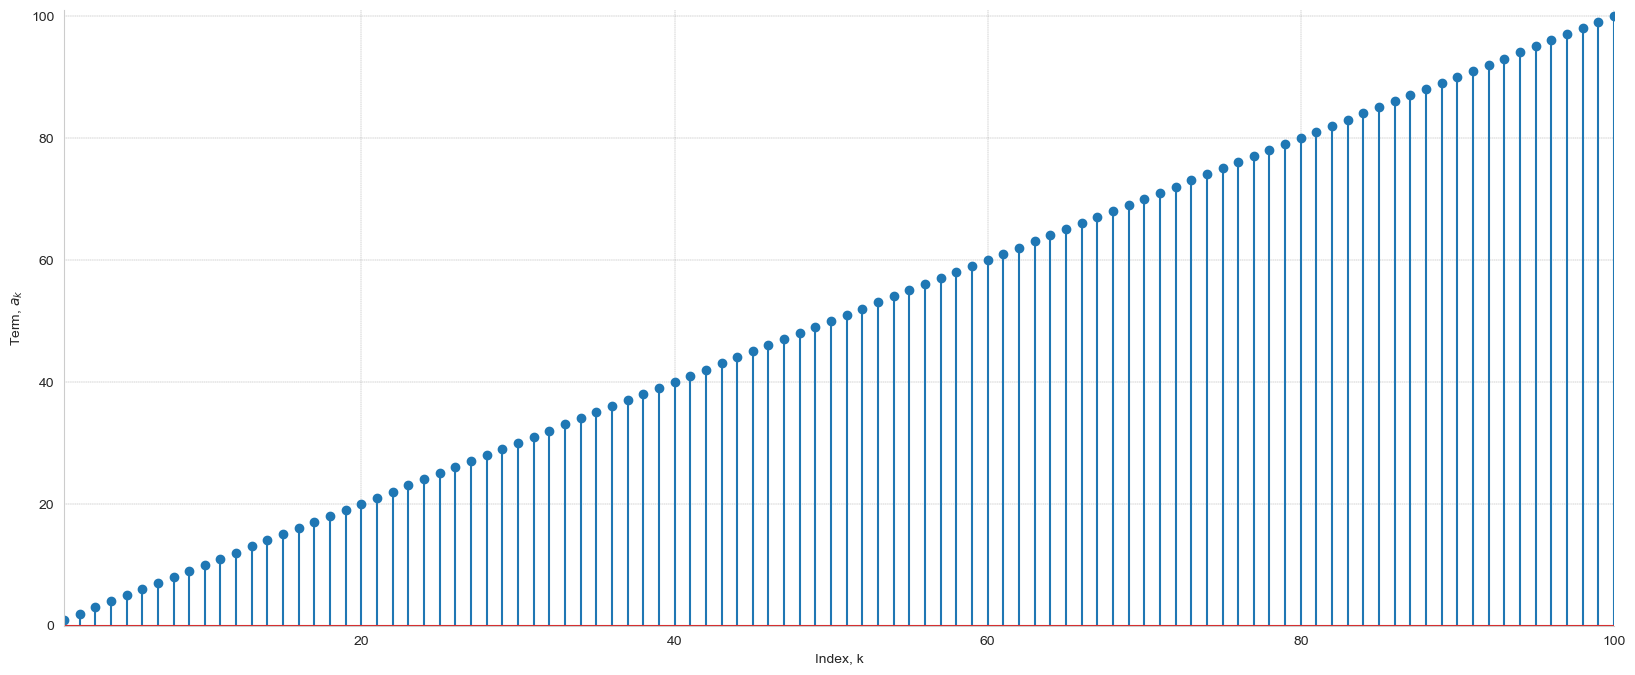

In [2]:
import numpy as np
from matplotlib import pyplot as plt


# Calculate sum of arithmetic progression sequence

def sum_AP(a, n, d):
    sum_ = (n * (a + a + (n - 1) * d)) / 2
    return sum_


a = 1  # initial term
n = 100  # number of terms
d = 1  # common difference

# Generate arithmetic progression, AP, sequence

AP_sequence = np.arange(a, a + n * d, d)
index = np.arange(1, n + 1, 1)
print("AP sequence")
print(AP_sequence)

sum_result = sum_AP(a, n, d)
sum_result_2 = np.sum(AP_sequence)
print("Sum of AP sequence = ", sum_result)

fig, ax = plt.subplots(figsize=(20, 8))

plt.xlabel("Index, k")
plt.ylabel("Term, $a_k$")
plt.stem(index, AP_sequence)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
plt.xlim(index.min(), index.max())
plt.ylim(0, AP_sequence.max() + 1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



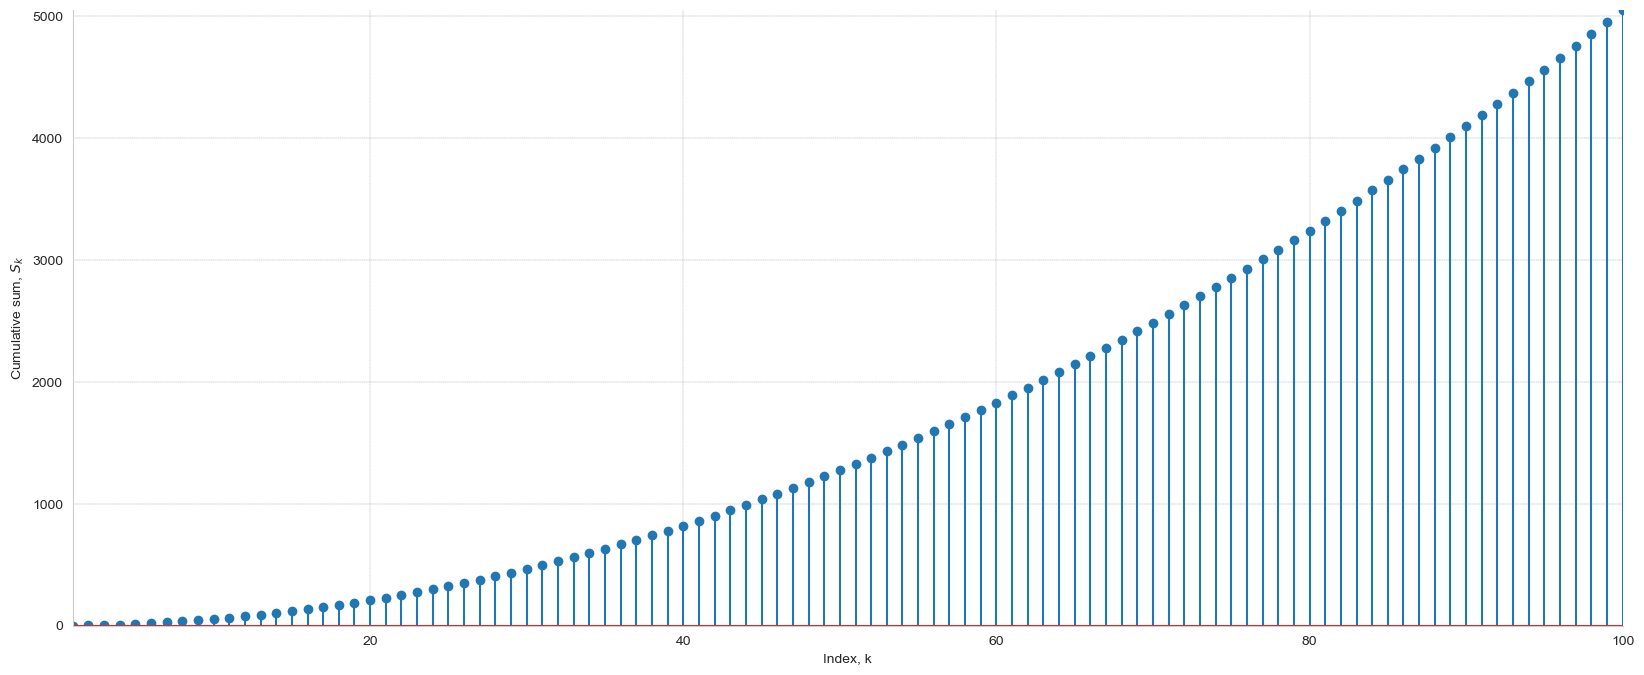

In [3]:
# 累加求和
cumsum_AP = np.cumsum(AP_sequence)

fig, ax = plt.subplots(figsize=(20, 8))

plt.xlabel("Index, k")
plt.ylabel("Cumulative sum, $S_k$")
plt.stem(index, cumsum_AP)
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
plt.xlim(index.min(), index.max())
plt.ylim(0, cumsum_AP.max() + 1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#### 等比数列

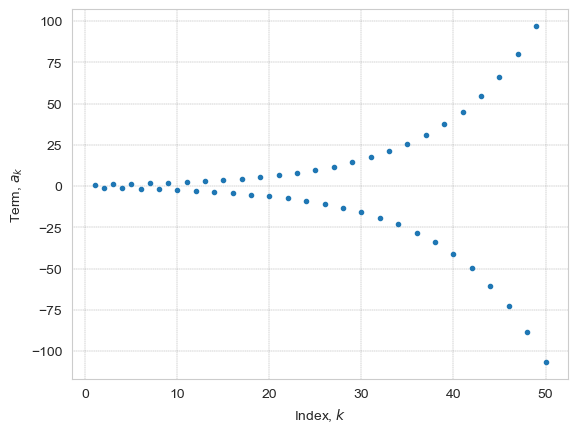

In [4]:
a = 1    # initial term
n = 50   # number of terms
q = -1.1 # common ratio, q = 1.1, 1, 0.9, -0.9, -1, -1.1

# Generate geometric progression, GP, sequence

GP_sequence = [a*q**i for i in range(n)]
index       = np.arange(1, n + 1, 1)

fig, ax = plt.subplots()

plt.xlabel("Index, $k$") 
plt.ylabel("Term, $a_k$") 
plt.plot(index, GP_sequence, marker = '.',markersize = 6, linestyle = 'None') 
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])

#### 斐波那契数列

In [5]:
def fib(n):
   if n <= 1:
       return (n)
   else:
       return (fib(n-1) + fib(n-2))

# Display n-term from Fibonacci sequence
n = 10  # number of terms
for i in range(n):
    print(fib(i))

0
1
1
2
3
5
8
13
21
34


#### 累加

In [6]:
import seaborn as sns


def heatmap_sum(data, i_array, j_array, title):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    ax = sns.heatmap(data, cmap='RdYlBu_r',
                     cbar_kws={"orientation": "horizontal"},  # 设置颜色条的方向
                     yticklabels=i_array, xticklabels=j_array,  # 设置刻度标签
                     ax=ax)
    ax.set_xlabel('Index, $j$')
    ax.set_ylabel('Index, $i$')

    ax.set_aspect("equal")
    plt.title(title)
    plt.yticks(rotation=0)


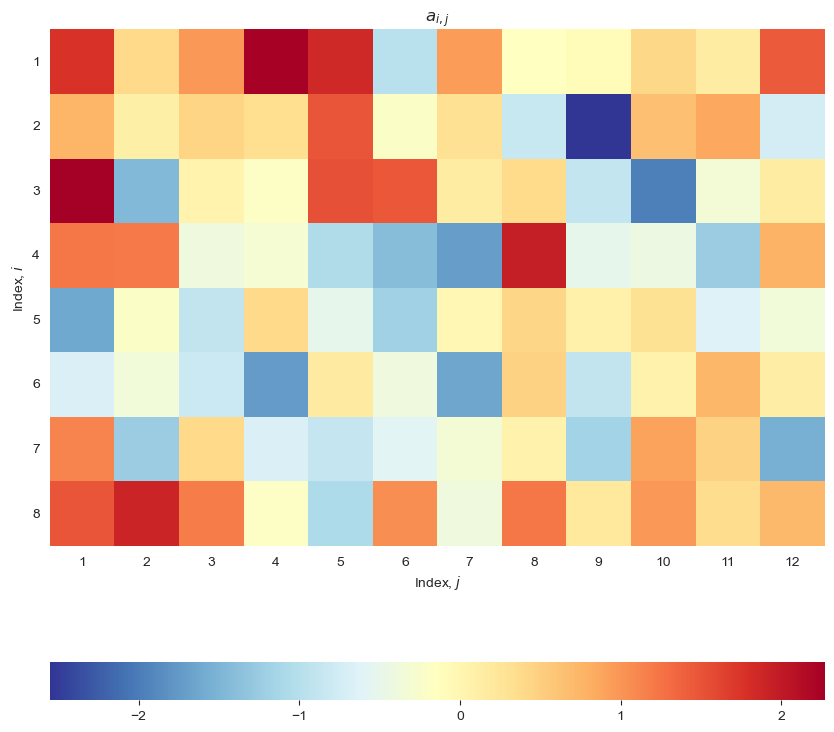

In [7]:
# Repeatability
np.random.seed(0)

m = 12  # j = 1 ~ n
n = 8  # i = 1 ~ m

j_array = np.arange(1, m + 1)
i_array = np.arange(1, n + 1)

# jj, ii = np.meshgrid(j_array, i_array)

a_ij = np.random.normal(loc=0.0, scale=1.0, size=(n, m))

title = '$a_{i,j}$'
heatmap_sum(a_ij, i_array, j_array, title)


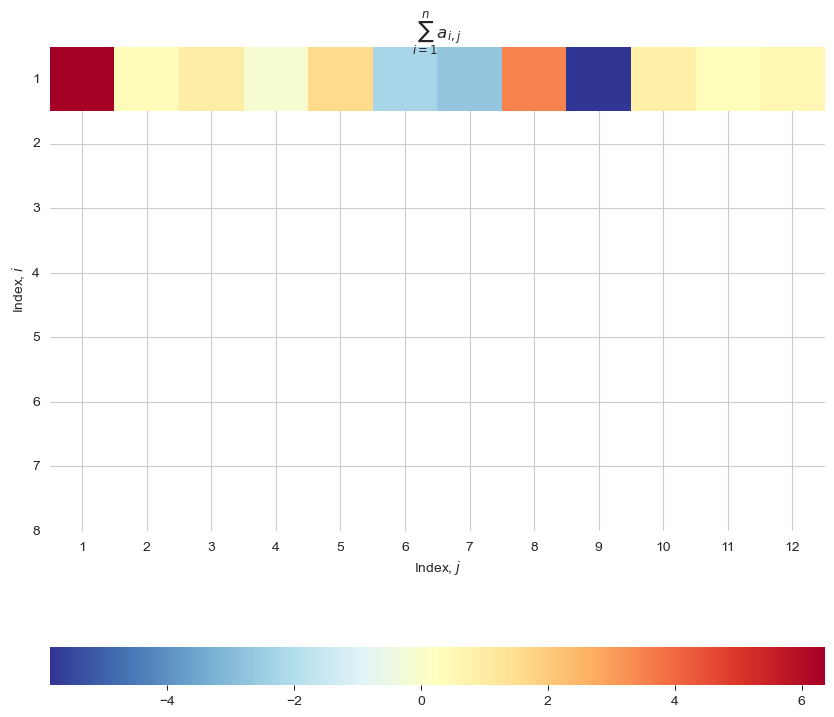

In [8]:
# sum_over_i = a_ij.sum(axis = 0).reshape((1,-1))

all_1 = np.ones((8, 1))
sum_over_i = all_1.T @ a_ij
# sum over row dimension

title = '$\sum_{i=1}^{n} a_{i,j}$'
heatmap_sum(sum_over_i, i_array, j_array, title)


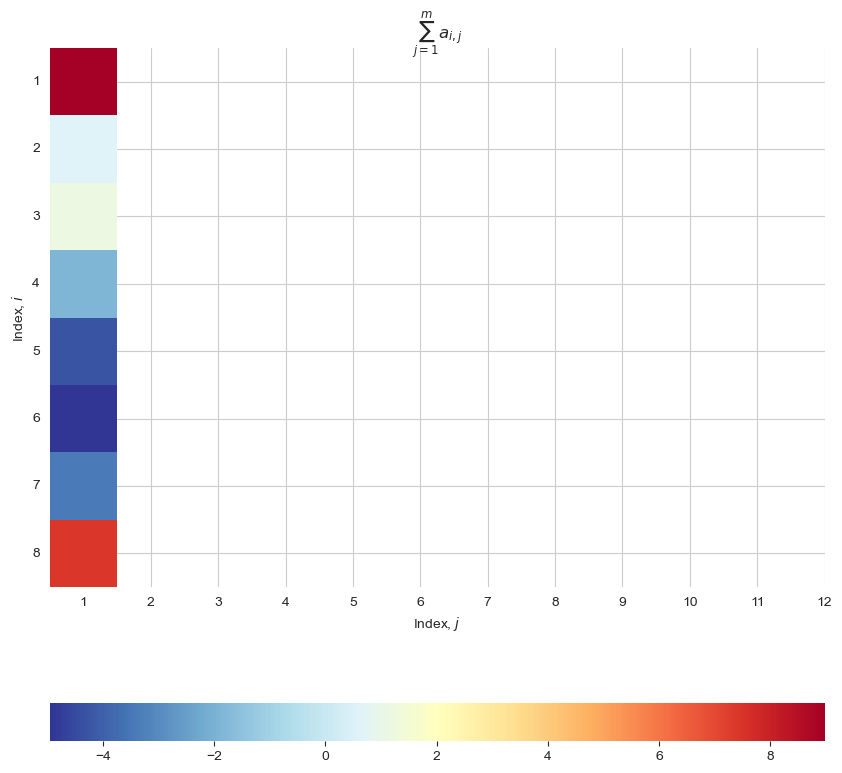

In [9]:
# sum_over_j = a_ij.sum(axis = 1).reshape((-1,1))

all_1 = np.ones((12, 1))
sum_over_j = a_ij @ all_1
# sum over column dimension

title = '$\sum_{j=1}^{m} a_{i,j}$'
heatmap_sum(sum_over_j, i_array, j_array, title)

#### 数列极限

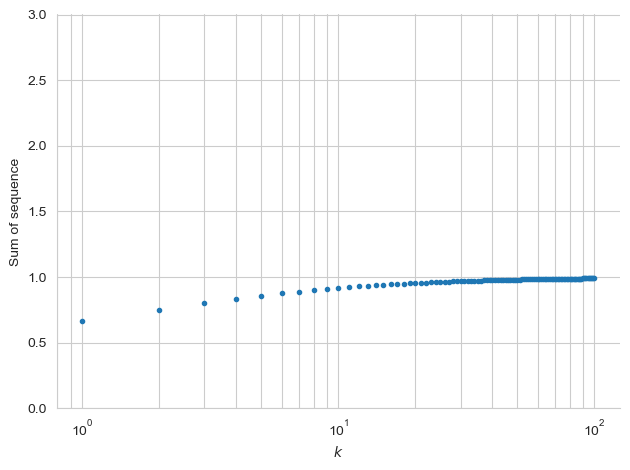

In [10]:
from sympy import limit_seq, Sum, lambdify, factorial
from sympy.abc import n, k


# 定义数列
# seq_sum = Sum(1 / 2**k,(k, 0, n))
seq_sum = Sum(1 /((k + 1)*(k + 2)),(k, 0, n))
# seq_sum = Sum(1 /factorial(k),(k, 0, n))
 
# 计算数列极限
seq_limit = limit_seq(seq_sum, n)
# 转换为可调用的函数
seq_sum_fcn = lambdify(n,seq_sum)

# 计算 n=5 时的近似值
seq_sum.evalf(subs={n: 5})
# evalf() 方法用于计算近似值
# subs={n: 5} 表示将符号 n 替换为值 5

# 生成数组
n_array = np.arange(0,100 + 1,1)

seq_sum_array = []

for n in n_array:
    
    # 计算数列极限
    seq_n = seq_sum_fcn(n)
    
    seq_sum_array.append(seq_n)

fig, ax = plt.subplots()

ax.plot(n_array,seq_sum_array,linestyle = 'None', marker = '.')

ax.set_xlabel('$k$')
ax.set_ylabel('Sum of sequence')
ax.set_xscale('log')
ax.set_ylim(0,3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(True, which="both", axis='x')
plt.tight_layout()
plt.show()


#### 估计圆周率$\pi$

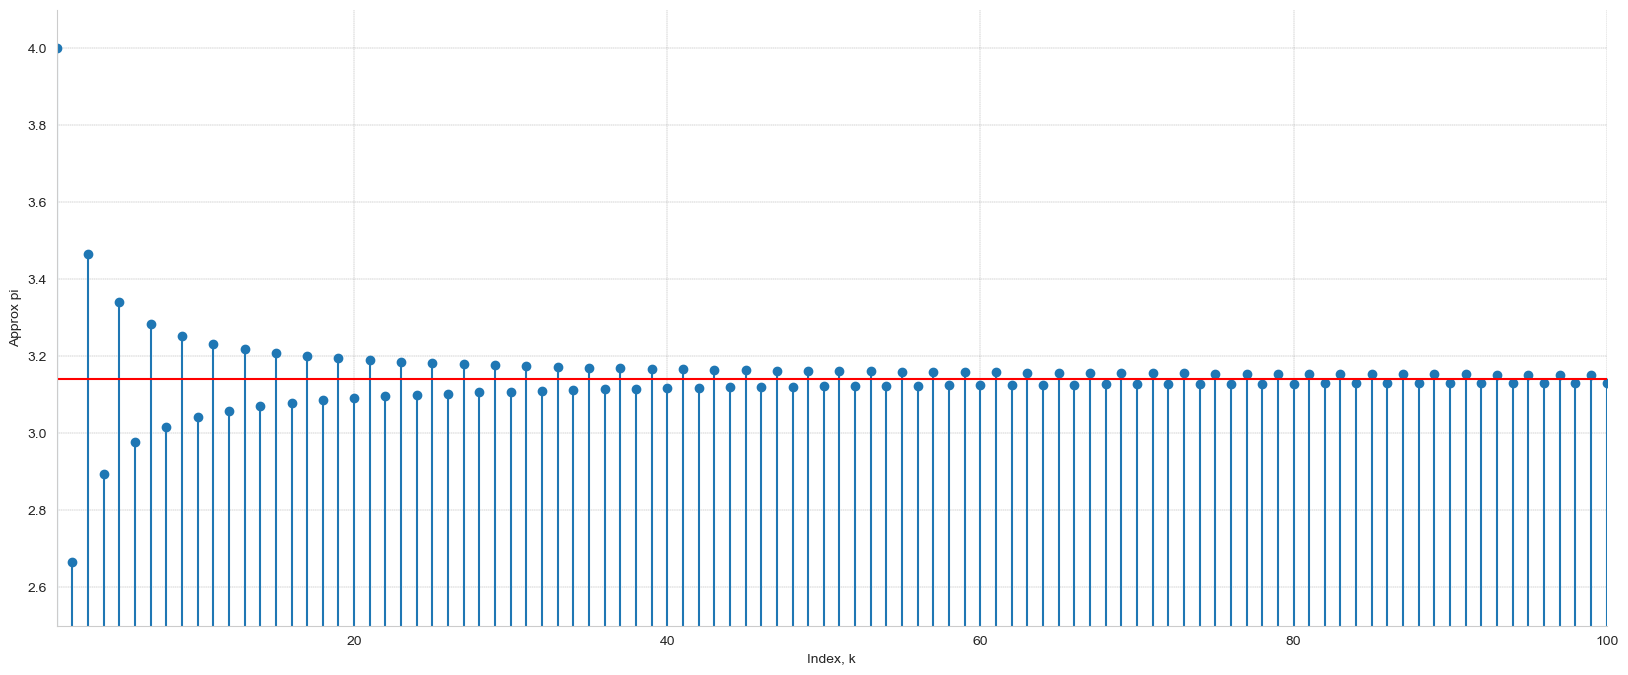

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n_array = np.arange(1, 100 + 1, 1)

a_n_array = (-1)**(n_array + 1)/(2*n_array - 1)

# 计算数列的累加和
a_n_cumsum = np.cumsum(a_n_array)

pi_appx = 4*a_n_cumsum

fig, ax = plt.subplots(figsize=(20, 8))

plt.xlabel("Index, k") 
plt.ylabel("Approx pi") 
plt.stem(n_array, pi_appx) 
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
plt.axhline(y=np.pi, color='r', linestyle='-')

plt.xlim(n_array.min(),n_array.max())
plt.ylim(2.5,4.1)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)